2020-0514-000000


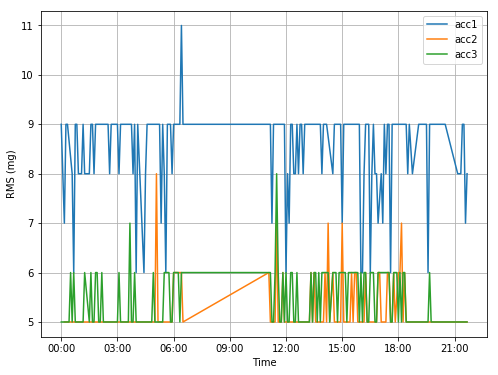

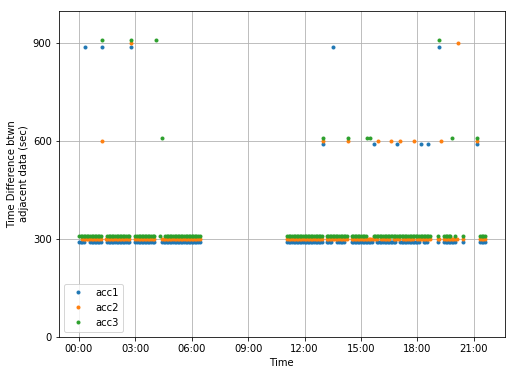

In [41]:
# from django.db.models import Model
# from cpanel.models import Acc1, Acc2, Acc3, SystemState, Event
from matplotlib.pyplot import *

import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
import datetime
import matplotlib.dates as mdates
from kk_util import *

today_datetime = datetime_string((time.time()//(3600*24))*3600*24)
print(today_datetime)

ao=[Acc1.objects.filter(measure_time__gte=today_datetime),
    Acc2.objects.filter(measure_time__gte=today_datetime),
    Acc3.objects.filter(measure_time__gte=today_datetime)]

# ao=[Acc1.objects.filter(measure_time__gte=today_datetime).filter(fileUploaded=True),
#     Acc2.objects.filter(measure_time__gte=today_datetime).filter(fileUploaded=True),
#     Acc3.objects.filter(measure_time__gte=today_datetime).filter(fileUploaded=True)]

timestamp = []
RMS = []
data = []
figure(1, figsize=(8,6))
clf()
figure(2, figsize=(8,6))
clf()
Markers = '...'
for i in range(3):
    timestamp_, RMS_ = [], []
    for a in ao[i]:
        timestamp_.append(datetime.datetime.strptime(a.measure_time,'%Y-%m%d-%H%M%S'))
        RMS_.append(a.rmsACC)
    timestamp.append(timestamp_)
    RMS.append(RMS_)
    figure(1)
    plot(timestamp_,RMS_, label='acc'+str(i+1))
    
    figure(2)
    dt = []
    for j in range(len(timestamp_)-1):
        dt.append((timestamp_[j+1]-timestamp_[j]).seconds+(i-1)*10)
    plot(timestamp_[:-1],dt,marker='{}'.format(Markers[i]), label='acc'+str(i+1), linestyle='')
    

figure(1)
gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
xlabel('Time')
ylabel('RMS (mg)')
grid(True)
legend()
    
figure(2)
gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
yticks([0, 300, 600, 900])
xlabel('Time')
ylabel('Time Difference btwn\nadjacent data (sec)')
grid(True)    
ylim([0, 1000]) 
legend()


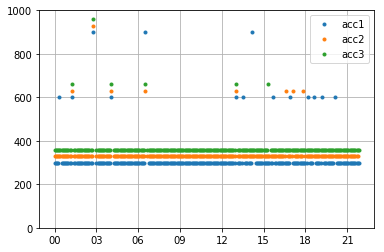

In [44]:
from ftplib import FTP
import sys
import logging
import os
from kk_util import *

    
ftp = FTP('192.168.1.51')
ftp.login('micro','python')
ftp.cwd('sd/data/{}'.format(date_string(time.time())))
files = []
ftp.dir(files.append)
ftp.close()

files
separator = ', '
files_ = separator.join(files)

from numpy import *
files
t0 = datetime.datetime(2020,5,14,0,0,0).timestamp()
t1 = datetime.datetime.now().timestamp()

timestamp = []
figure(1)
clf()
Markers = '...'
for i in range(3):
    timestamp_ = []
    for ts in arange(t0,t1,300):
        t = datetime.datetime.fromtimestamp(ts)
        filename = 'gcam1-acc{}-{}'.format(i+1,t.strftime('%Y-%m%d-%H%M%S'))
        if filename in files_:
            timestamp_.append(t)
    timestamp.append(timestamp_)
            
    dt = []
    for j in range(len(timestamp_)-1):
        dt.append((timestamp_[j+1]-timestamp_[j]).seconds+i*30)
    plot(timestamp_[:-1],dt,marker='{}'.format(Markers[i]), label='acc'+str(i+1), linestyle='')
    gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))    
grid(True)    
ylim([0, 1000]) 
legend()
